# 不同亮度下蓝点的坐标

看看屏幕在同样的纯蓝下（RGB：0,255,0），不同的亮度条件测出来的光谱有无变化

## 导入6组蓝光数据，生成光谱类实例

In [1]:
import os
os.getcwd()

'/home/edward/Documents/Major/jupyter_notebooks'

In [2]:
os.chdir('..')
os.getcwd()

'/home/edward/Documents/Major'

In [4]:
lst = [x for x in os.listdir('./spec_info/2018_10_05/') if x.startswith('blue')]
lst.sort()
print(lst)

['blue 1_2018_10_05_16_37_57.sp', 'blue 2_2018_10_05_16_42_45.sp', 'blue3_2018_10_05_16_46_16.sp', 'blue4_2018_10_05_16_51_03.sp', 'blue5_2018_10_05_16_54_30.sp', 'blue6_2018_10_05_16_56_58.sp']


In [5]:
lst = [os.path.join('/home/edward/Documents/Major/spec_info/2018_10_05/', x) for x in lst]
print(lst)

['/home/edward/Documents/Major/spec_info/2018_10_05/blue 1_2018_10_05_16_37_57.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/blue 2_2018_10_05_16_42_45.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/blue3_2018_10_05_16_46_16.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/blue4_2018_10_05_16_51_03.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/blue5_2018_10_05_16_54_30.sp', '/home/edward/Documents/Major/spec_info/2018_10_05/blue6_2018_10_05_16_56_58.sp']


In [7]:
from spectool import *

/home/edward/anaconda3/envs/python-colour/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: "x" independent variable is not uniform, unpredictable results may occur!
  warn(*args, **kwargs)


In [6]:
os.getcwd()

'/home/edward/Documents/Major'

In [8]:
blue1 = Spectrum(lst[0], 'blue1')
blue2 = Spectrum(lst[1], 'blue2')
blue3 = Spectrum(lst[2], 'blue3')
blue4 = Spectrum(lst[3], 'blue4')
blue5 = Spectrum(lst[5], 'blue5')
blue6 = Spectrum(lst[4], 'blue6')
spec_list = [blue1, blue2, blue3, blue4, blue5, blue6]

/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: "domain" and "range" variables have different size, "range" variable will be resized to "domain" variable shape!
  warn(*args, **kwargs)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: Aligning "D65" illuminant shape to "CIE 1931 2 Degree Standard Observer" colour matching functions shape.
  warn(*args, **kwargs)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: Aligning "blue1" spectral power distribution shape to "CIE 1931 2 Degree Standard Observer" colour matching functions shape.
  warn(*args, **kwargs)
/home/edward/anaconda3/envs/python-colour/lib/python3.6/site-packages/colour/utilities/verbose.py:141: ColourWarning: Aligning "blue2" spectral power distribution shape to "CIE 1931 2 Degree Standard Observer" colour matching func

## 显示他们的亮度

In [9]:
L_lst = []
for spec in spec_list:
    L_lst.append(spec.get('L'))
    print(spec.name, "|", spec.get('L'), 'cd/m2')

blue1 | 1.0460666 cd/m2
blue2 | 2.4808912 cd/m2
blue3 | 5.5413384 cd/m2
blue4 | 8.51937 cd/m2
blue5 | 15.21198 cd/m2
blue6 | 21.873585 cd/m2


## 亮度变化可视化

In [10]:
from pyecharts import Bar

In [13]:
attr = ['blue1', 'blue2', 'blue3', 'blue4', 'blue5', 'blue6']
bar = Bar("亮度变化", "六个红点样本的亮度")
bar.add("亮度值（cd/m2）", attr, L_lst, is_label_show=True)

## 显示样本的xy坐标

In [14]:
data = {
    'blue1': {'x': blue1.x,'y': blue1.y}, 
    'blue2': {'x': blue2.x,'y': blue2.y}, 
    'blue3': {'x': blue3.x,'y': blue3.y}, 
    'blue4': {'x': blue4.x,'y': blue4.y}, 
    'blue5': {'x': blue5.x,'y': blue5.y}, 
    'blue6': {'x': blue6.x,'y': blue6.y}, 
}
spec_xy = pd.DataFrame(data).T
print(spec_xy)

              x         y
blue1  0.152458  0.047459
blue2  0.151698  0.046322
blue3  0.151387  0.045664
blue4  0.151300  0.045285
blue5  0.151161  0.045159
blue6  0.151209  0.044892


In [15]:
spec_xy.loc[:,'x'].values

array([0.1524581 , 0.15169808, 0.15138721, 0.15129961, 0.15116131,
       0.15120943])

In [16]:
from pyecharts import Line

In [18]:
v1 = list(spec_xy.loc[:,'x'].values)
v2 = list(spec_xy.loc[:,'y'].values)
attr = [str(x) for x in L_lst]
line = Line("蓝点随亮度变化的坐标变化")
line.add("x", attr, v1,mark_line=['average'])
line.add("y", attr, v2,mark_line=['average'])


## **结论：** 可以看出亮度基本不对蓝点坐标造成影响, 6个样本的x，y值的平均值分别为（0.15, 0.05）

## 将六个蓝点样本绘制在CIE1931图上

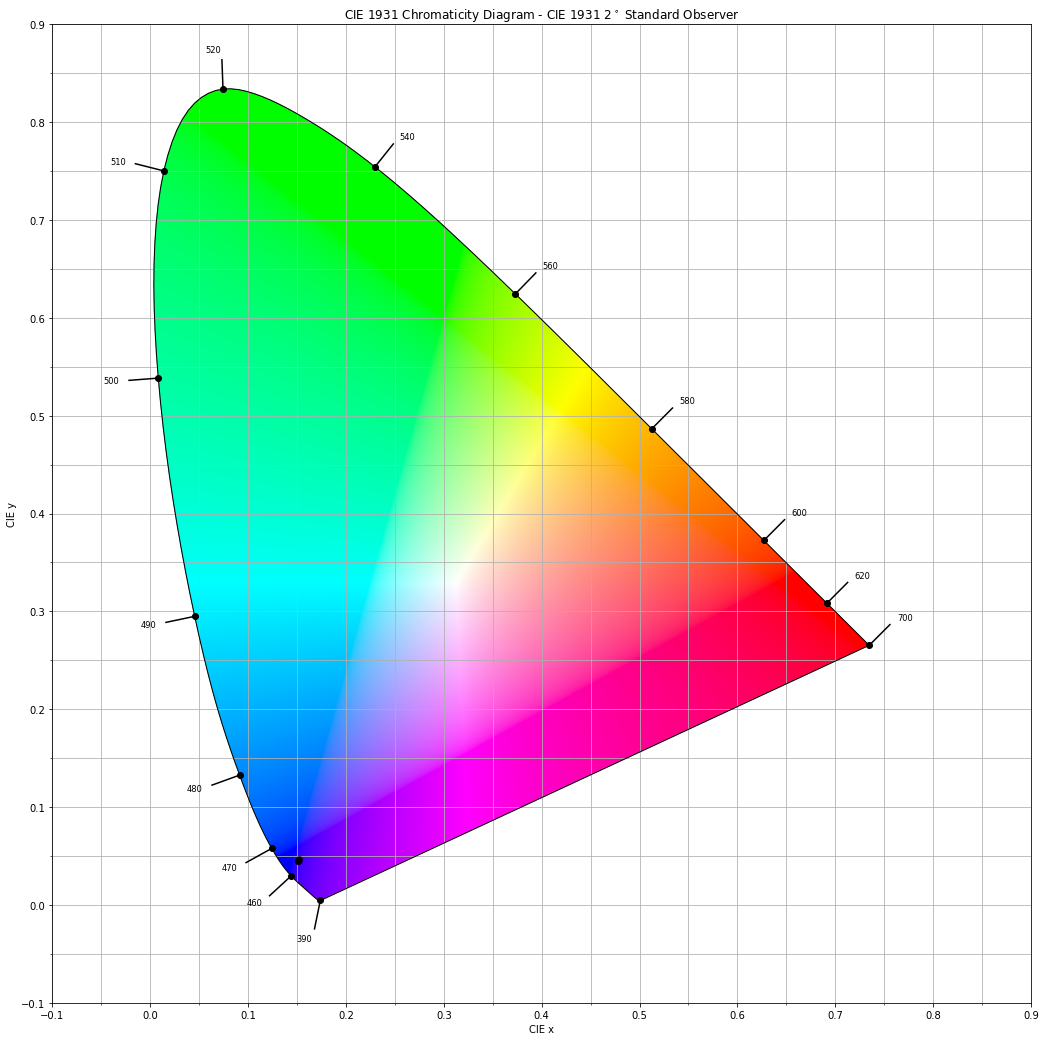

In [19]:
spcs_in_one_diagram(*spec_list)

## 总结： 在后续的实验研究过程中，蓝点坐标取值（0.68, 0.31），不考虑亮度对其坐标值的影响

附：各个样本的光谱（可以看出，除了纵坐标有变化，能量值变大，图形基本一致）

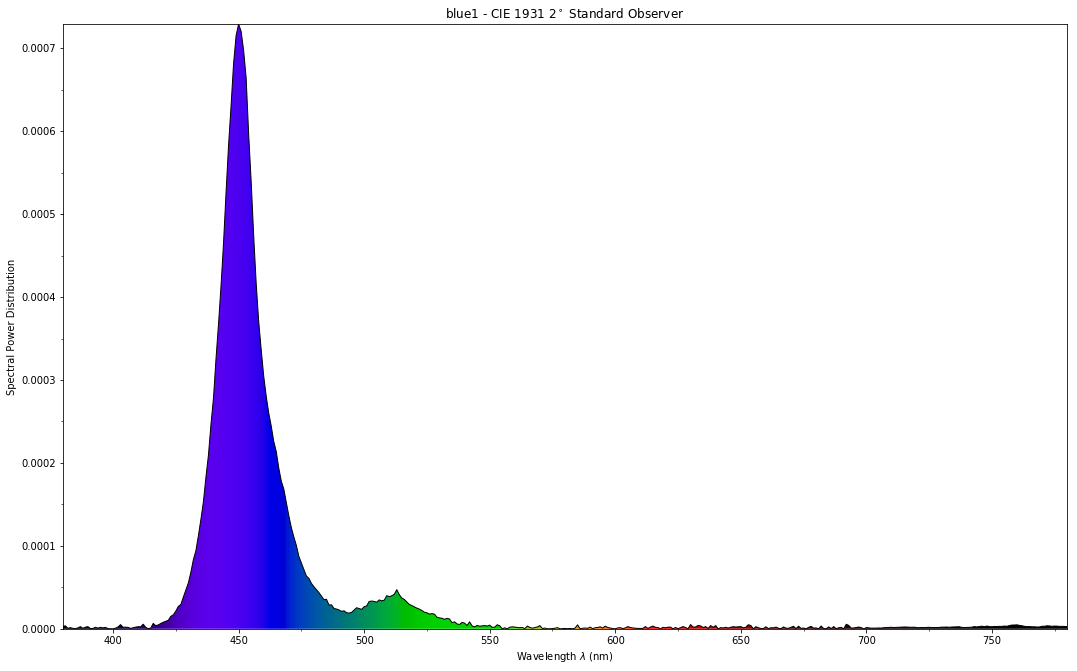

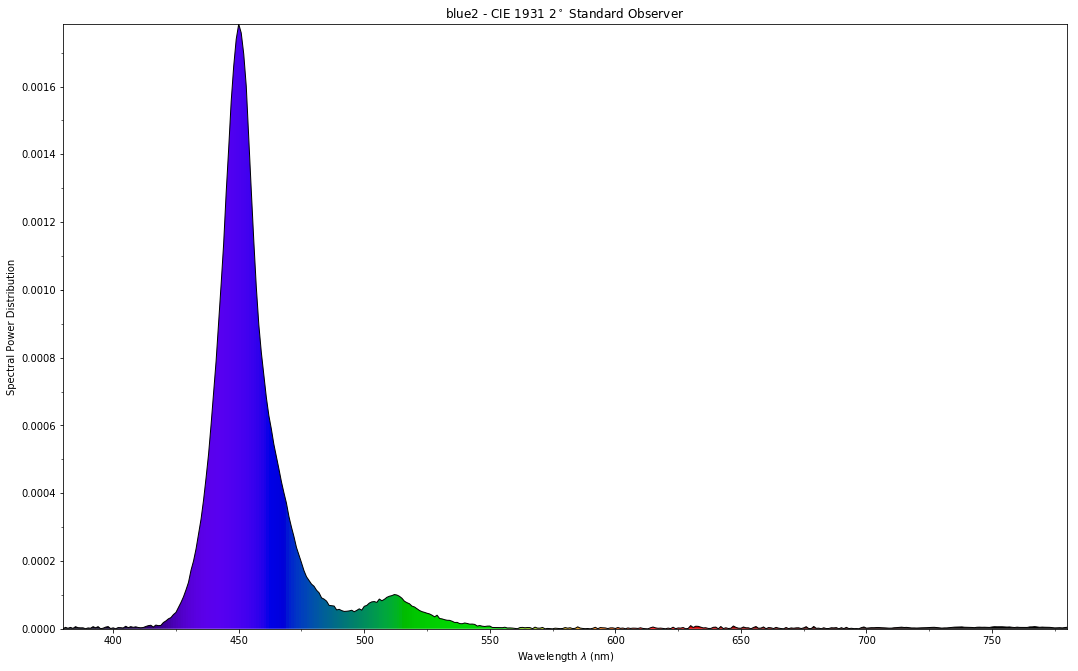

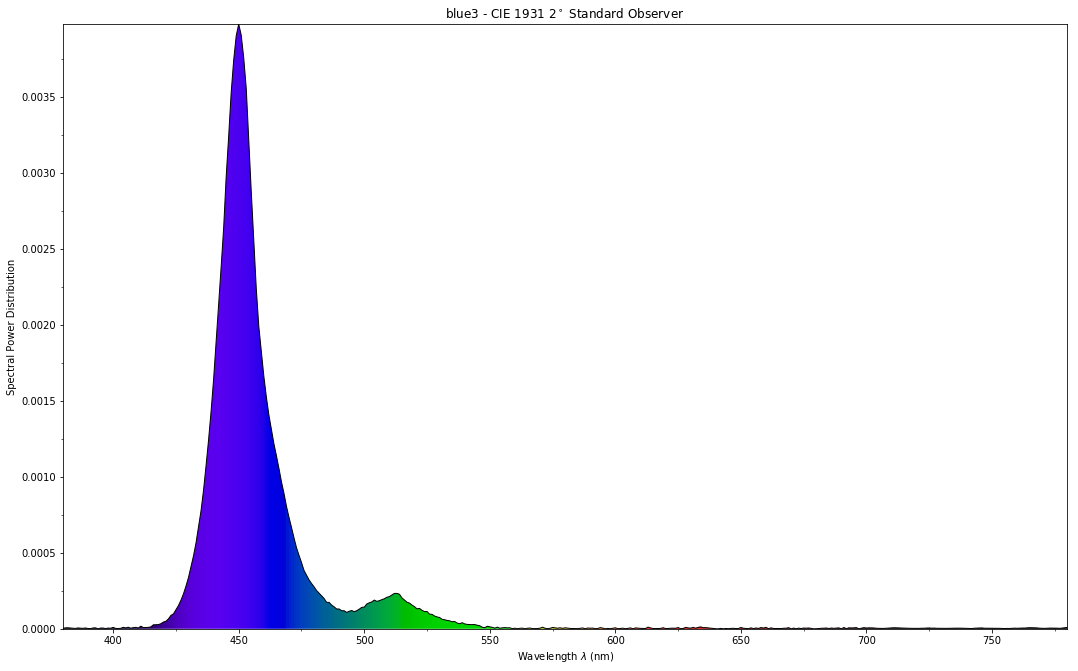

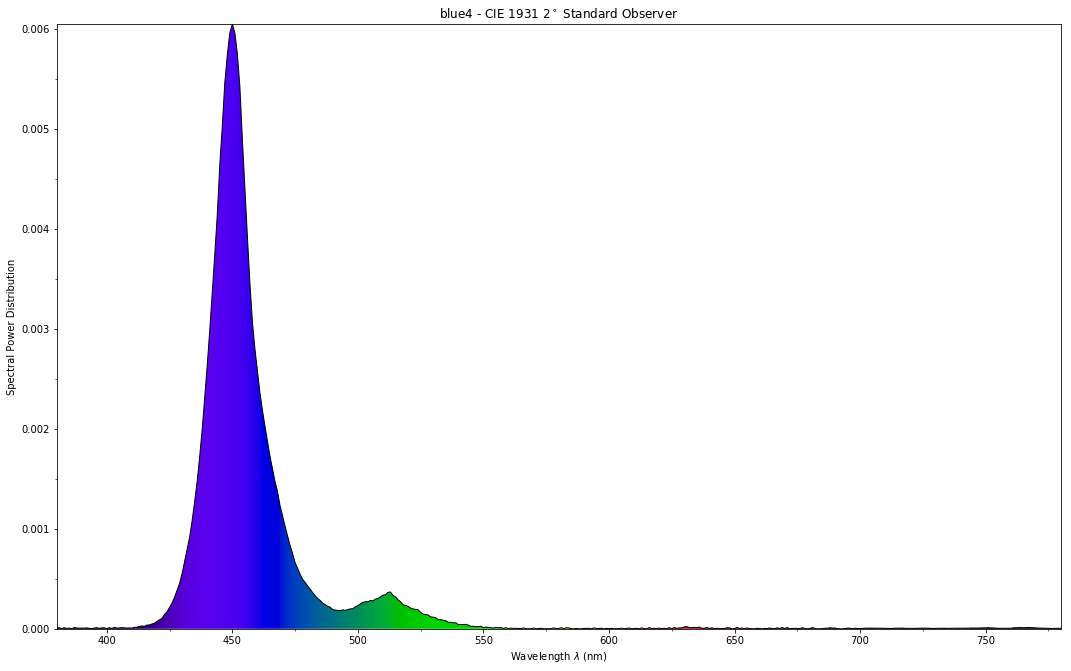

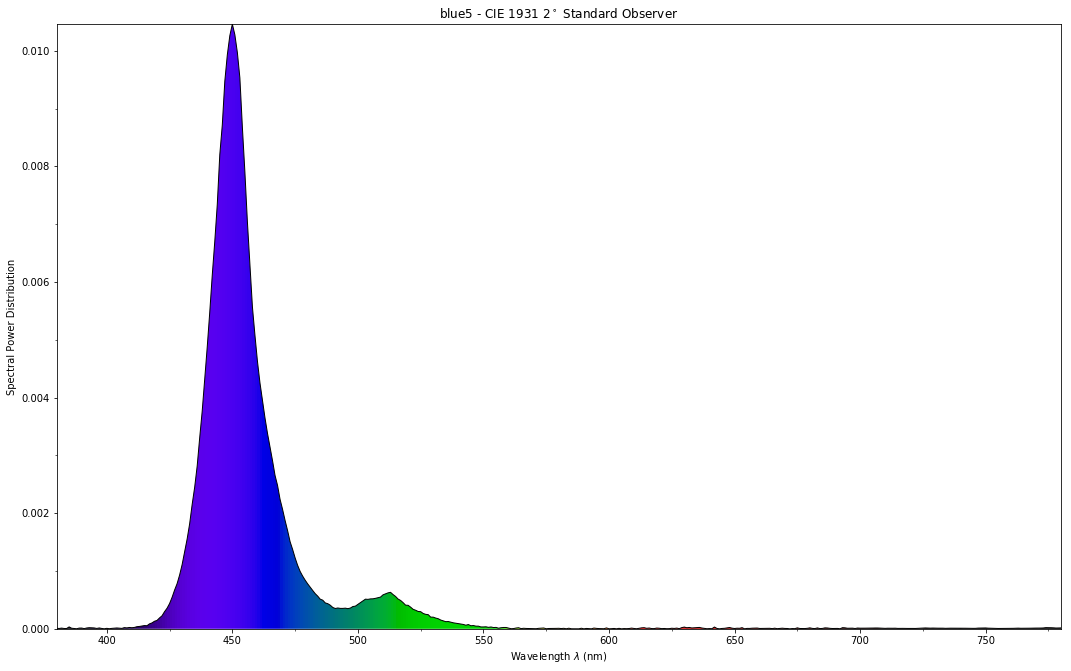

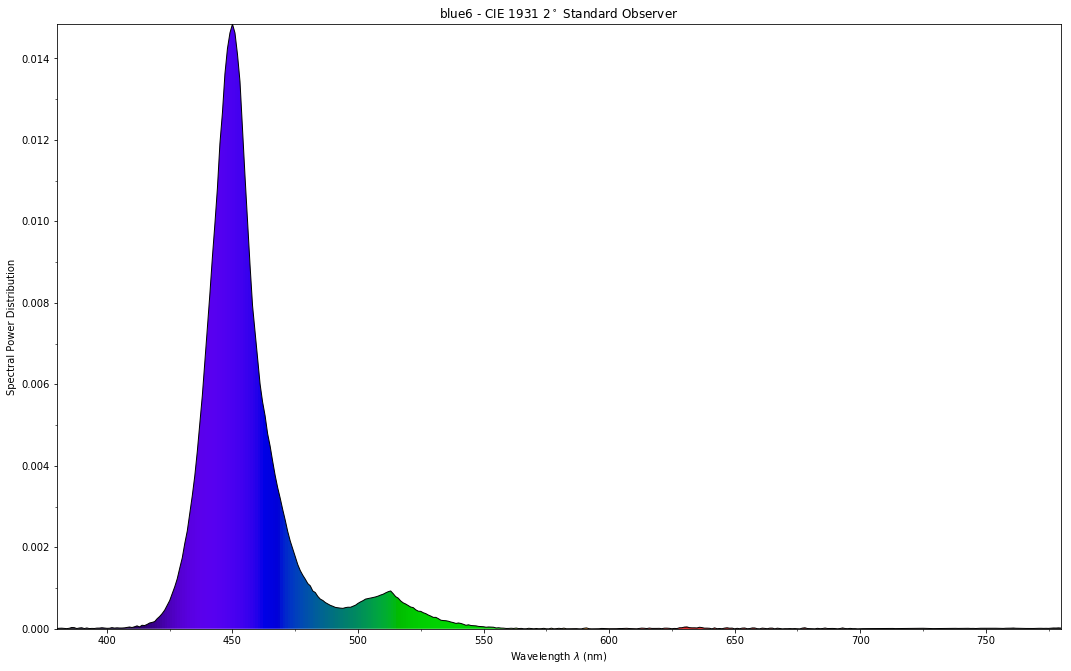

In [20]:
for spec in spec_list:
    spec.spd_plot()